# Data related to the Graphite counter electrode project
## Demo for ECS Webinar (data for *ACS Energy Letters*, 2024, 9, 4581–4586)

### Define everything before coding (use Zhenglab style)

In [32]:
# Predefined prams, use your own style here for matplotlib and other packages
# Not all the packages here are needed for the code below, but it is good to 'call' all the packages you need in one project.
# a few font-rela

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib.pyplot import figure
from pathlib import Path
import matplotlib.font_manager as font_manager
import matplotlib.ticker as ticker
import scipy
from scipy import signal
from scipy.fft import fft, fftfreq
from scipy.signal import medfilt
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import FancyArrowPatch
import seaborn as sns
from matplotlib import cm
from matplotlib.ticker import LinearLocator
from scipy.signal import find_peaks

rc = ({
    'mathtext.fontset':"custom", #custom
    'figure.dpi':600,
    'savefig.dpi':600,
    'axes.grid':False,
    'axes.labelsize':6.5,
    'legend.fontsize':6.5,
    'axes.titlesize':6.5,
    'xtick.top' :False,
    'ytick.right' :False,
    'xtick.labelsize':6,
    'ytick.labelsize':6,
    'lines.linewidth':.5,
    'lines.markersize':3,
    'lines.markeredgewidth':0.25,
    'lines.markeredgecolor':'k',
    'axes.unicode_minus': True,
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.right': True,
    'axes.spines.top': True,
    'legend.frameon':False
})
mpl.rcParams.update(rc)

# CV analysis of graphite in acid and base (10 mV s-1)

# CV data using Pt wire (100 cycles)
This part is in markdown format, you can write note here.

*For beginners, it is better to just write line-by-line*

Text(1, 1.03, 'Pt|C (KOH)')

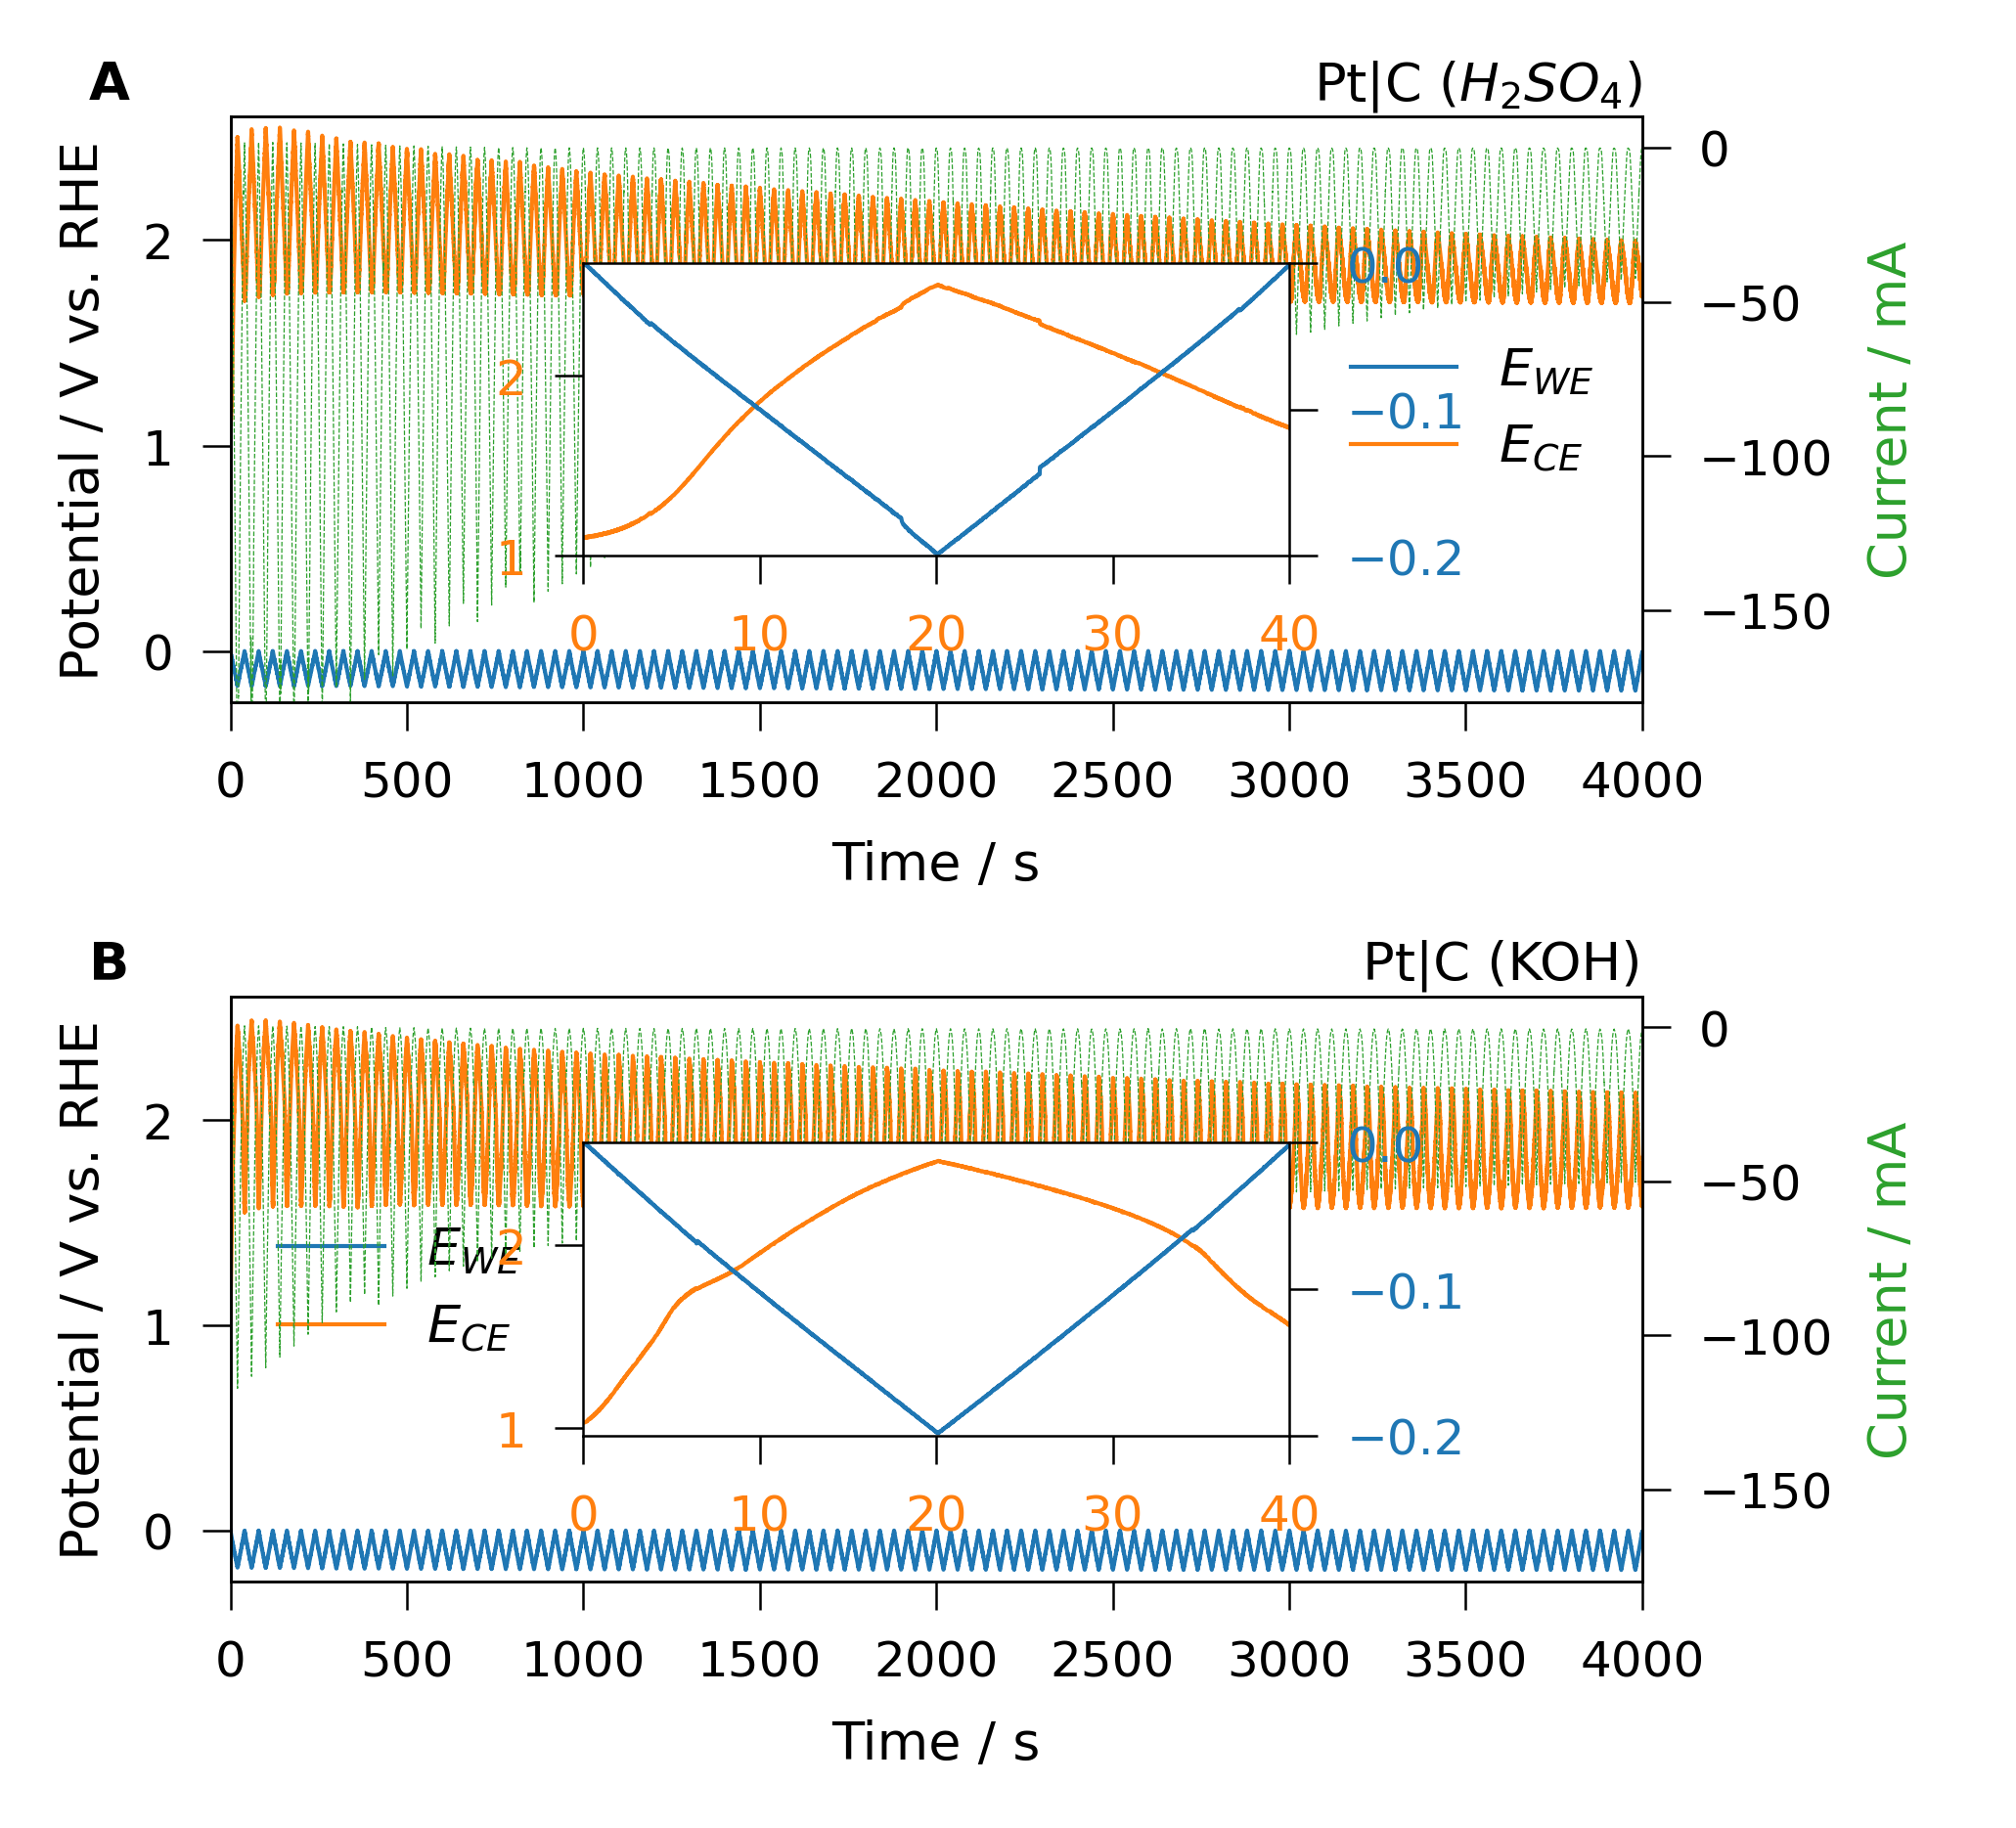

In [37]:
# define color (tab10)
cmap = plt.cm.tab10
colors = cmap(np.linspace(0,1,10))

# Pt|C in H2SO4  10 mVs-1
# import data
data = pd.read_csv('CVdata/H2SO4 Pt WIRE-C 10 mV s-1 0-200 H2 vs 265mV.csv',sep='\t')
# define varibles
s_2_10_time = data['Elapsed Time (s)'] - 471 # Time starts from 0s, starting at EWE = 0 vs RHE
s_2_10_Current = data['Current (A)'] *1000 # convert A to mA
s_2_10_V_work = data['Potential (V)'] + 0.265 # convert to vs. RHE from vs. Ag/AgCl
s_2_10_V_cell = data['Sync ADC Input (V)'] * -1 # convert polarity of cell voltage
s_2_10_V_charge = data['Charge (C)']
s_2_10_V_counter = s_2_10_V_cell + s_2_10_V_work # calculate the counter electrode potential

# start plotting
fig, (a1, a3) = plt.subplots(2,1, figsize=(3.25,3),layout='constrained')

a1.plot(s_2_10_time, s_2_10_V_work, label='$E_{WE}$',zorder=0)
a1.plot(s_2_10_time, s_2_10_V_counter, label='$E_{CE}$',zorder=0)
a12 = a1.twinx()
a12.set_ylim(-180,10)
a12.plot(s_2_10_time, s_2_10_Current, ls='--', linewidth = 0.15, label='I',c=colors[2])
a1.set_ylabel(r'Potential / V vs. RHE')
a12.set_ylabel(r'Current / mA',c=colors[2])
a1.set_xlabel(r'Time / s')
a1.set_xlim(0,4000)
a1.set_ylim(-0.25, 2.6)
a1.legend()
a1_inset = inset_axes(a1, width="50%", height="50%", loc="center")
a1_inset.plot(s_2_10_time, s_2_10_V_counter, label='$E_{CE}$',zorder=0, c=colors[1])
a1_inset.tick_params(labelcolor=colors[1])
a1_inset.set_xlim(0,40)
a1_insety = a1_inset.twinx()
a1_insety.plot(s_2_10_time, s_2_10_V_work*1.17, label='$E_{WE}$')
a1_insety.set_ylim(-0.20, 0)
a1_insety.tick_params(labelcolor=colors[0])

# Pt|C in KOH  10 mVs-1
data = pd.read_csv('CVdata/KOH Pt WIRE-C 10 mV s-1 0-200 H2 vs 933mV.csv',sep='\t')
s_2_10_time = data['Elapsed Time (s)'] - 378
s_2_10_Current = data['Current (A)'] * 1000
s_2_10_V_work = data['Potential (V)'] + 0.933
s_2_10_V_cell = data['Sync ADC Input (V)'] * -1
s_2_10_V_charge = data['Charge (C)']
s_2_10_V_counter = s_2_10_V_cell + s_2_10_V_work

a3.plot(s_2_10_time, s_2_10_V_work, label='$E_{WE}$',zorder=0)
a3.plot(s_2_10_time, s_2_10_V_counter, label='$E_{CE}$',zorder=0)
a32 = a3.twinx()
a32.set_ylim(-180,10)
a32.plot(s_2_10_time, s_2_10_Current, ls='--', linewidth = 0.15, label='I',c=colors[2])
a3.set_ylabel(r'Potential / V vs. RHE')
a32.set_ylabel(r'Current / mA',c=colors[2])
a3.set_xlabel(r'Time / s')
a3.set_xlim(np.min(s_2_10_time),np.max(s_2_10_time))
a3.set_xlim(0,4000)
a3.legend(loc='best')
a3.set_ylim(-0.25, 2.6)
a3_inset = inset_axes(a3, width="50%", height="50%", loc="center")
a3_inset.plot(s_2_10_time, s_2_10_V_counter, label='$E_{CE}$',zorder=0, c=colors[1])
a3_inset.tick_params(labelcolor=colors[1])
a3_inset.set_xlim(0,40)
a3_insety = a3_inset.twinx()
a3_insety.plot(s_2_10_time, s_2_10_V_work*1.1, label='$E_{WE}$')
a3_insety.set_ylim(-0.20, 0)
a3_insety.tick_params(labelcolor=colors[0])

a1.text(-0.1,1.03,'A', fontweight='bold', transform=a1.transAxes, fontsize=6.5)
a3.text(-0.1,1.03,'B', fontweight='bold', transform=a3.transAxes, fontsize=6.5)

a1.text(1,1.03,r'Pt|C ($H_2SO_4$)', fontweight='normal', transform=a1.transAxes, ha = 'right', fontsize=6.5)
a3.text(1,1.03,'Pt|C (KOH)', fontweight='normal', transform=a3.transAxes, ha = 'right', fontsize=6.5)

## A more organized way (for experienced users)

Text(1, 1.03, 'Pt|C (KOH)')

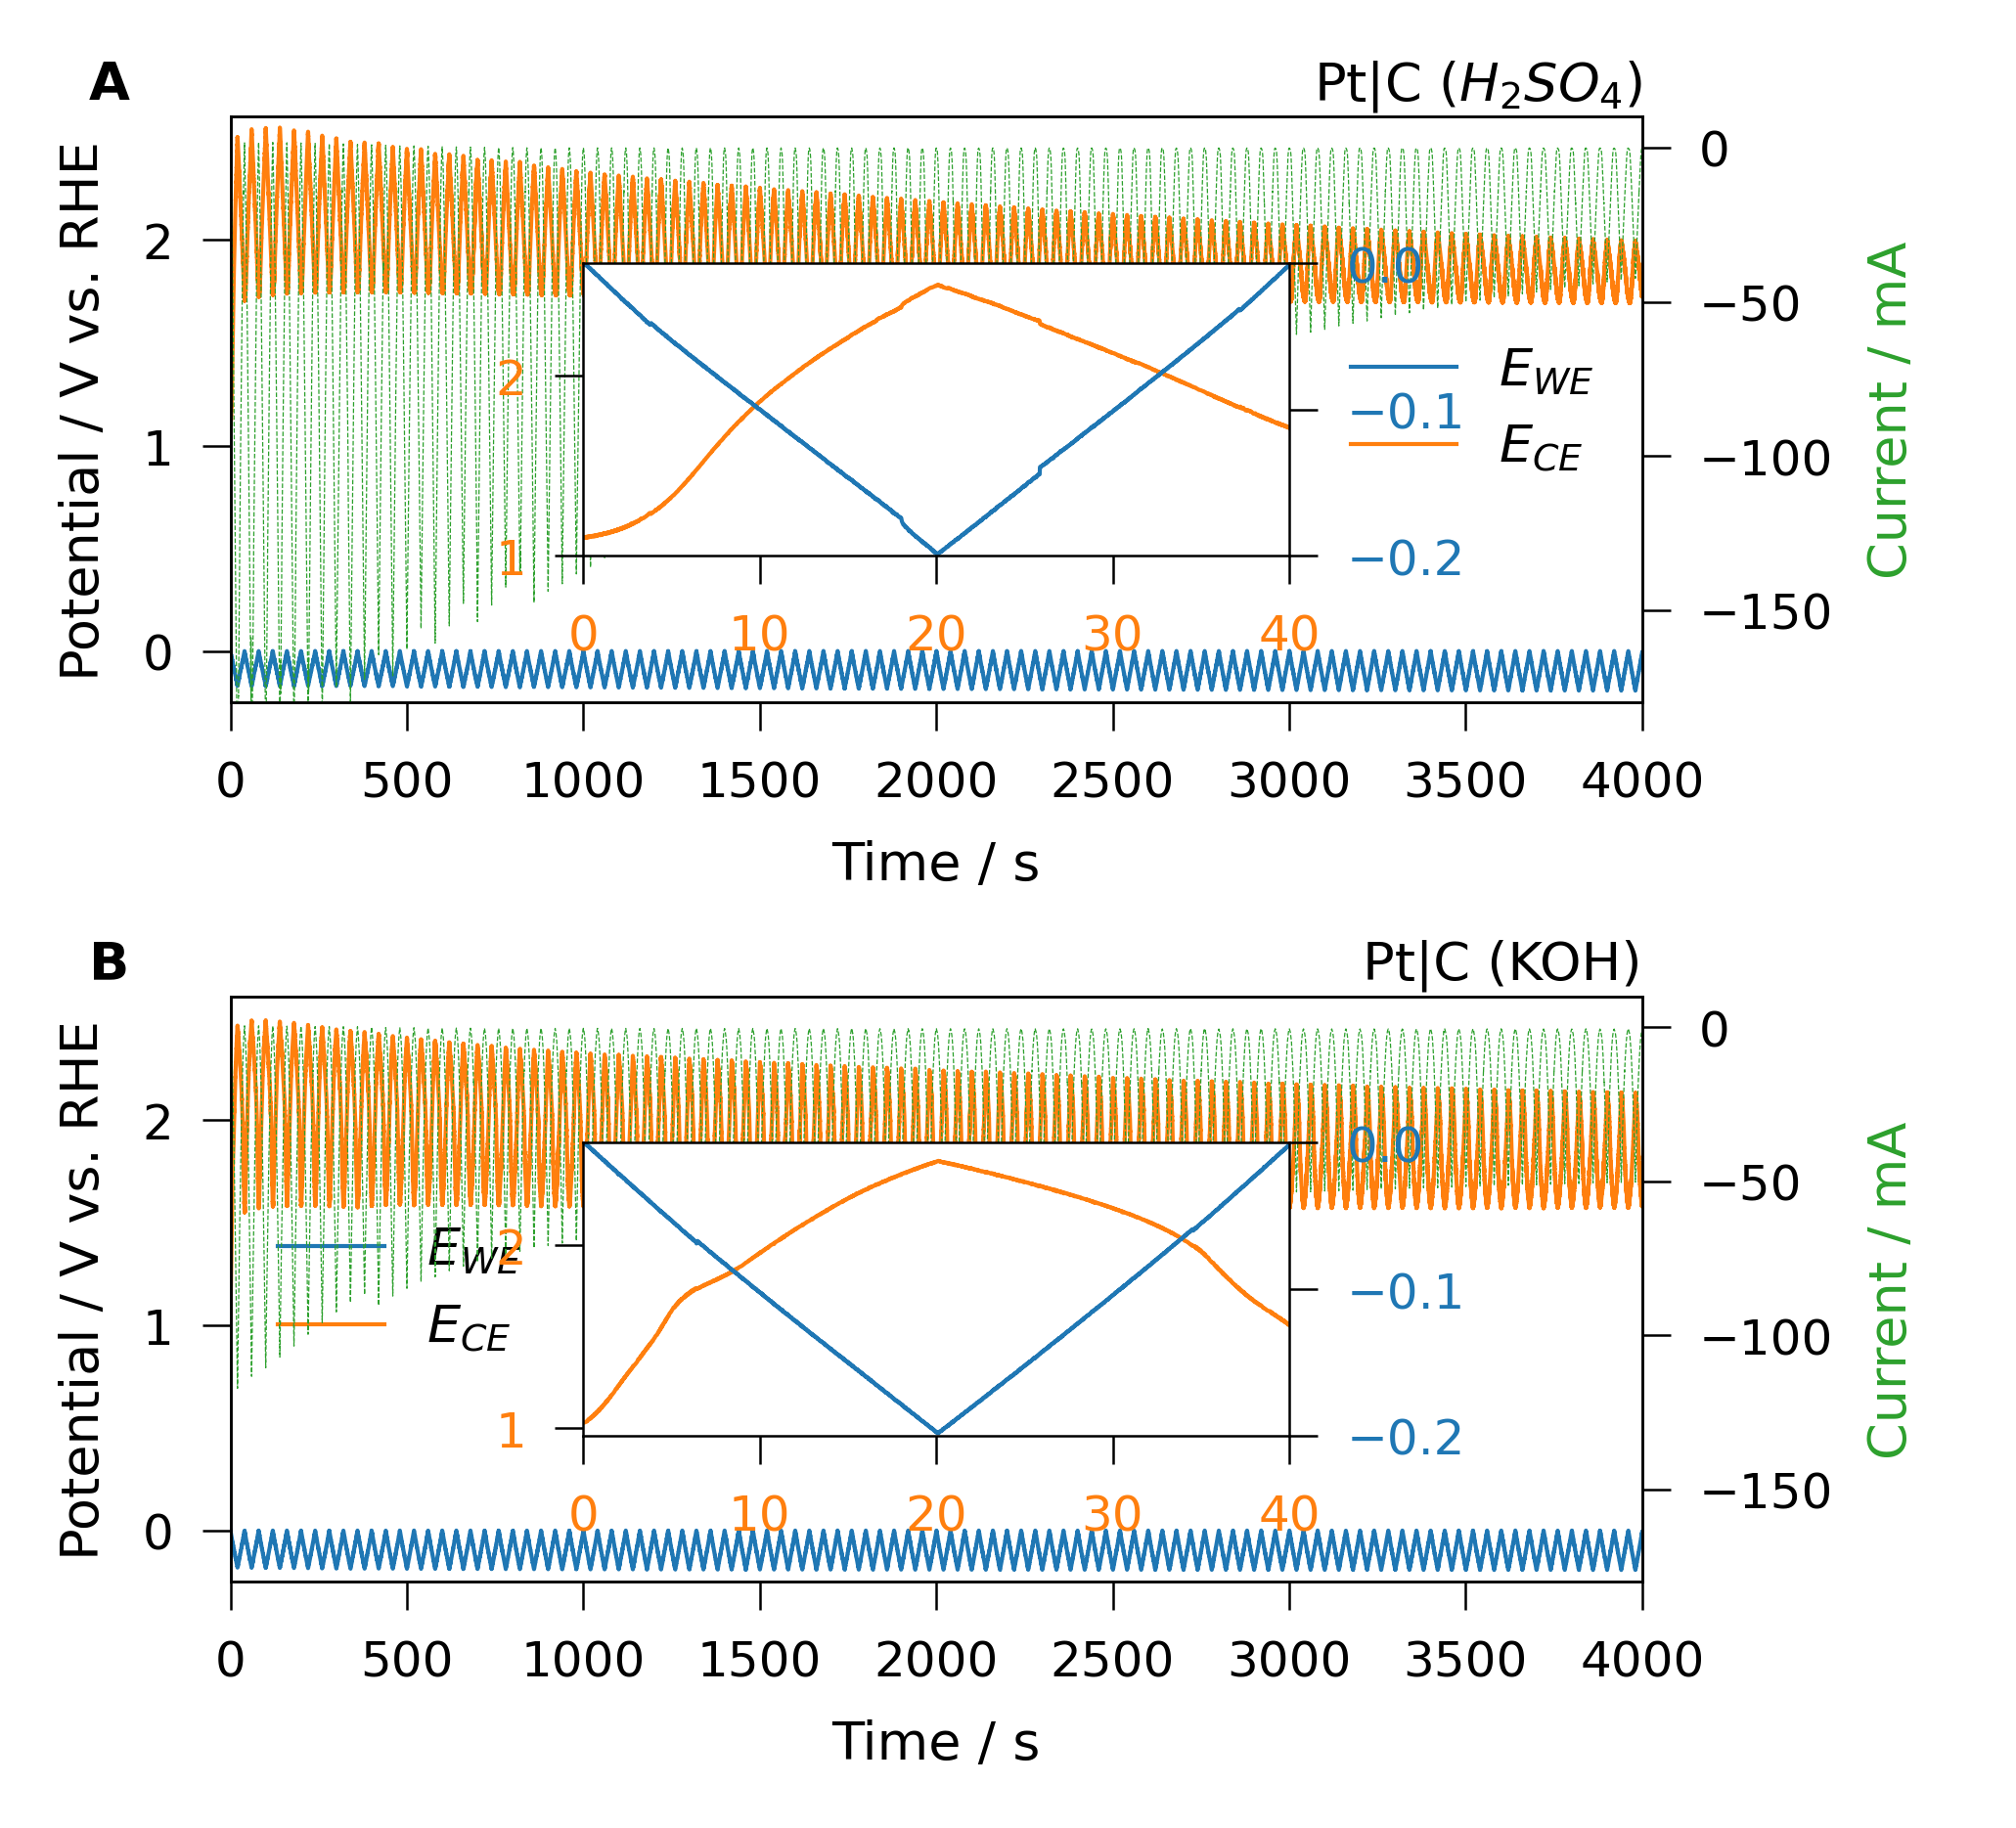

In [39]:
# Function to process data from a CSV file
def process_data(file_path, ref_potential, time_offset):
    data = pd.read_csv(file_path, sep='\t')
    # Adjust time, current, and potentials
    time = data['Elapsed Time (s)'] - time_offset
    current = data['Current (A)'] * 1000  # Convert A to mA
    v_work = data['Potential (V)'] + ref_potential  # Convert to RHE
    v_cell = data['Sync ADC Input (V)'] * -1  # Reverse polarity
    v_charge = data['Charge (C)']
    v_counter = v_cell + v_work  # Calculate counter electrode potential
    return time, current, v_work, v_counter, v_charge, data['Segment']

# Function to plot potential and current over time
def plot_cycle(ax, time, v_work, v_counter, current, colors):
    ax.plot(time, v_work, label='$E_{WE}$', zorder=0)
    ax.plot(time, v_counter, label='$E_{CE}$', zorder=0)
    ax2 = ax.twinx()
    ax2.set_ylim(-180, 10)
    ax2.plot(time, current, ls='--', linewidth=0.15, label='I', c=colors[2])
    ax.set_ylabel(r'Potential / V vs. RHE')
    ax2.set_ylabel(r'Current / mA', c=colors[2])
    ax.set_xlabel(r'Time / s')
    ax.set_xlim(0, 4000)
    ax.set_ylim(-0.25, 2.6)
    ax.legend()

# Function to create an inset plot
def plot_inset(ax, time, v_counter, v_work, colors):
    inset = inset_axes(ax, width="50%", height="50%", loc="center")
    inset.plot(time, v_counter, label='$E_{CE}$', zorder=0, c=colors[1])
    inset.tick_params(labelcolor=colors[1])
    inset.set_xlim(0, 40)
    insety = inset.twinx()
    insety.plot(time, v_work, label='$E_{WE}$', c=colors[0])
    insety.set_ylim(-0.20, 0)
    insety.tick_params(labelcolor=colors[0])


# Define colormap and colors
cmap = plt.cm.tab10
colors = cmap(np.linspace(0, 1, 10))

# Create subplots
fig, (a1, a3) = plt.subplots(2, 1, figsize=(3.25, 3), layout='constrained')

# Process and plot data for Pt|C in H2SO4
time, current, v_work, v_counter, v_charge, segment = process_data(
    'CVdata/H2SO4 Pt WIRE-C 10 mV s-1 0-200 H2 vs 265mV.csv', 0.265, 471)
plot_cycle(a1, time, v_work, v_counter, current, colors)
plot_inset(a1, time, v_counter, v_work * 1.17, colors)
plot_charge_vs_ece(cc, v_charge, v_counter, segment, r'Pt|C 10 $mV s^{-1}$ ($H_2SO_4$)')

# Process and plot data for Pt|C in KOH
time, current, v_work, v_counter, v_charge, segment = process_data(
    'CVdata/KOH Pt WIRE-C 10 mV s-1 0-200 H2 vs 933mV.csv', 0.933, 378)
plot_cycle(a3, time, v_work, v_counter, current, colors)
plot_inset(a3, time, v_counter, v_work * 1.1, colors)
plot_charge_vs_ece(cc, v_charge, v_counter, segment, r'Pt|C 10 $mV s^{-1}$ (KOH)')

# Annotate plots
a1.text(-0.1, 1.03, 'A', fontweight='bold', transform=a1.transAxes, fontsize=6.5)
a3.text(-0.1, 1.03, 'B', fontweight='bold', transform=a3.transAxes, fontsize=6.5)

a1.text(1, 1.03, r'Pt|C ($H_2SO_4$)', fontweight='normal', transform=a1.transAxes, ha='right', fontsize=6.5)
a3.text(1, 1.03, 'Pt|C (KOH)', fontweight='normal', transform=a3.transAxes, ha='right', fontsize=6.5)

Text(-0.1, 1.03, 'C')

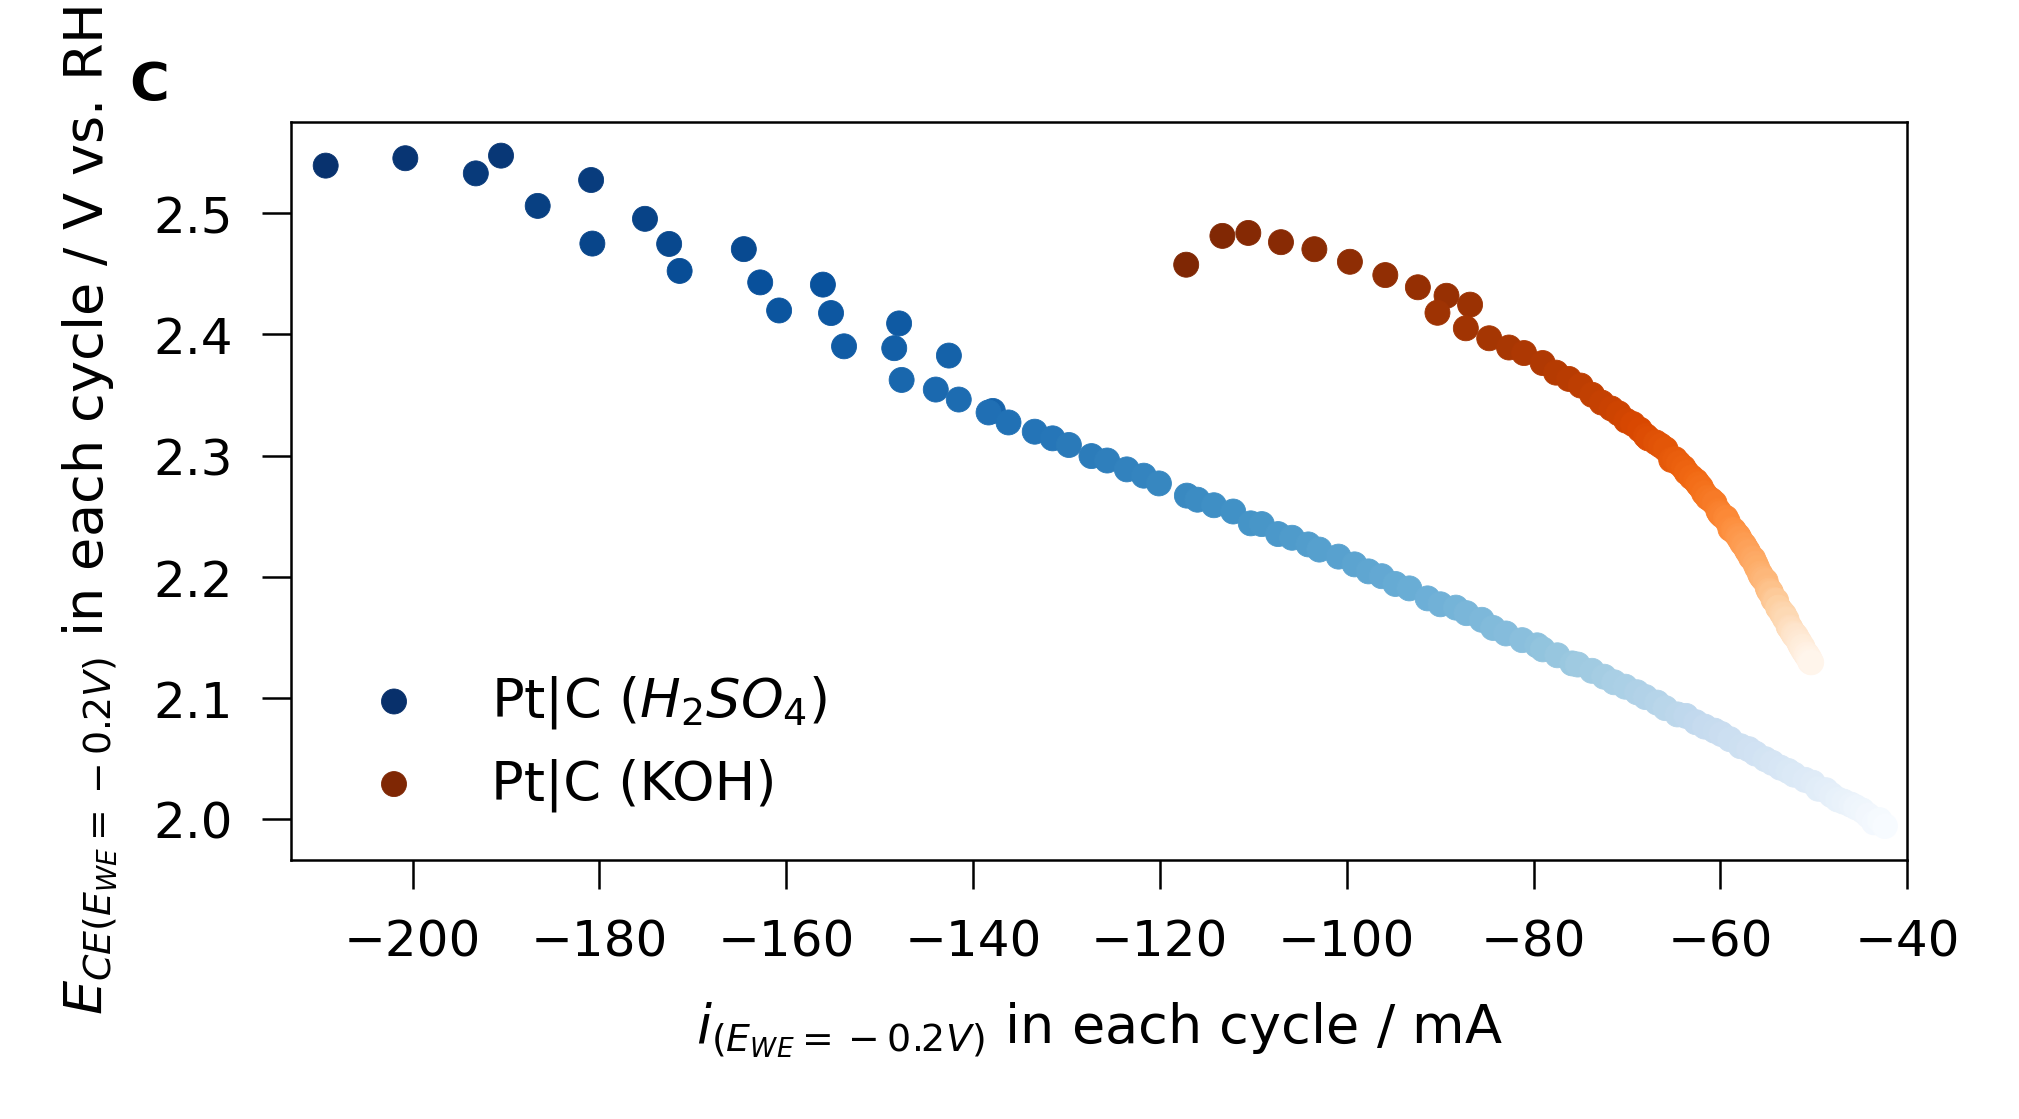

In [40]:
def read_and_prepare_data(file_path, ref_electrode_calibration):
    data = pd.read_csv(file_path, sep='\t')
    MCV_C_WE = data['Potential (V)'] + ref_electrode_calibration
    MCV_C_I = data['Current (A)'] * 1000  # from A to mA
    MCV_C_CellE = data['Sync ADC Input (V)'] * -1
    MCV_C_CE = MCV_C_WE + MCV_C_CellE
    Cycle_number = data['Segment'] - 6
    return pd.DataFrame({
        'MCV_C_WE': MCV_C_WE,
        'MCV_C_I': MCV_C_I,
        'MCV_C_CellE': MCV_C_CellE,
        'MCV_C_CE': MCV_C_CE,
        'Cycle_number': Cycle_number
    })

def find_min_I_per_cycle(df, exclude_cycles=[-7, -6, -5, -4, -3, -2, -1, 0, 101]):
    filtered_df = df[~df['Cycle_number'].isin(exclude_cycles)]
    min_I_per_cycle = filtered_df.loc[filtered_df.groupby('Cycle_number')['MCV_C_I'].idxmin()]
    return min_I_per_cycle[['Cycle_number', 'MCV_C_I', 'MCV_C_CE']]

def plot_data(ax, df, cmap, marker, label):
    scatter = ax.scatter(df['MCV_C_I'], df['MCV_C_CE'],
                         c=df['Cycle_number'], cmap=cmap, marker=marker, linewidths=0.1, label=label)
    return scatter

fig, ax = plt.subplots(figsize=(3.25, 1.75), layout='constrained')

# Process each dataset
datasets = [
    ('CVdata/H2SO4 Pt WIRE-C 10 mV s-1 0-200 H2 vs 265mV.csv', 0.265, 'Blues_r', 'o', r'Pt|C ($H_2SO_4$)'),
    ('CVdata/KOH Pt WIRE-C 10 mV s-1 0-200 H2 vs 933mV.csv', 0.933, 'Oranges_r', 'o', 'Pt|C (KOH)'),
]

for file_path, ref_calib, cmap, marker, label in datasets:
    df = read_and_prepare_data(file_path, ref_calib)
    min_I_CE_df = find_min_I_per_cycle(df)
    scatter = plot_data(ax, min_I_CE_df, cmap, marker, label)
    if 'IEM' in label:
        plt.colorbar(scatter)

ax.set_ylabel(r'$E_{CE(E_{WE} = −0.2 V)}$ in each cycle / V vs. RHE')
ax.set_xlabel(r'$i_{(E_{WE} = −0.2 V)}$ in each cycle / mA', fontsize=6.5)
ax.legend(ncol=1, loc='best')
ax.set_xlim(-213, -40)
ax.text(-0.1, 1.03, 'C', fontweight='bold', transform=ax.transAxes, fontsize=6.5)

## Counter electrode used in the literature

        Category  Value
0   Graphite rod   0.67
1             Pt   0.29
2  Glassy carbon   0.02
3         Others   0.02


([<matplotlib.patches.Wedge at 0x38988f380>,
 [Text(-0.6719347283614971, 1.1361794404150083, 'Graphite rod'),
  Text(0.5242353109130896, -1.211436064673599, 'Pt'),
  Text(1.2966191835829524, -0.24734326909111176, 'Glassy carbon'),
  Text(1.3173952855217745, -0.08288342225681873, 'Others')],
 [Text(-0.3665098518335439, 0.6197342402263681, '67%'),
  Text(0.2859465332253216, -0.6607833080037813, '29%'),
  Text(0.707246827408883, -0.13491451041333366, '2%'),
  Text(0.7185792466482407, -0.04520913941281021, '2%')])

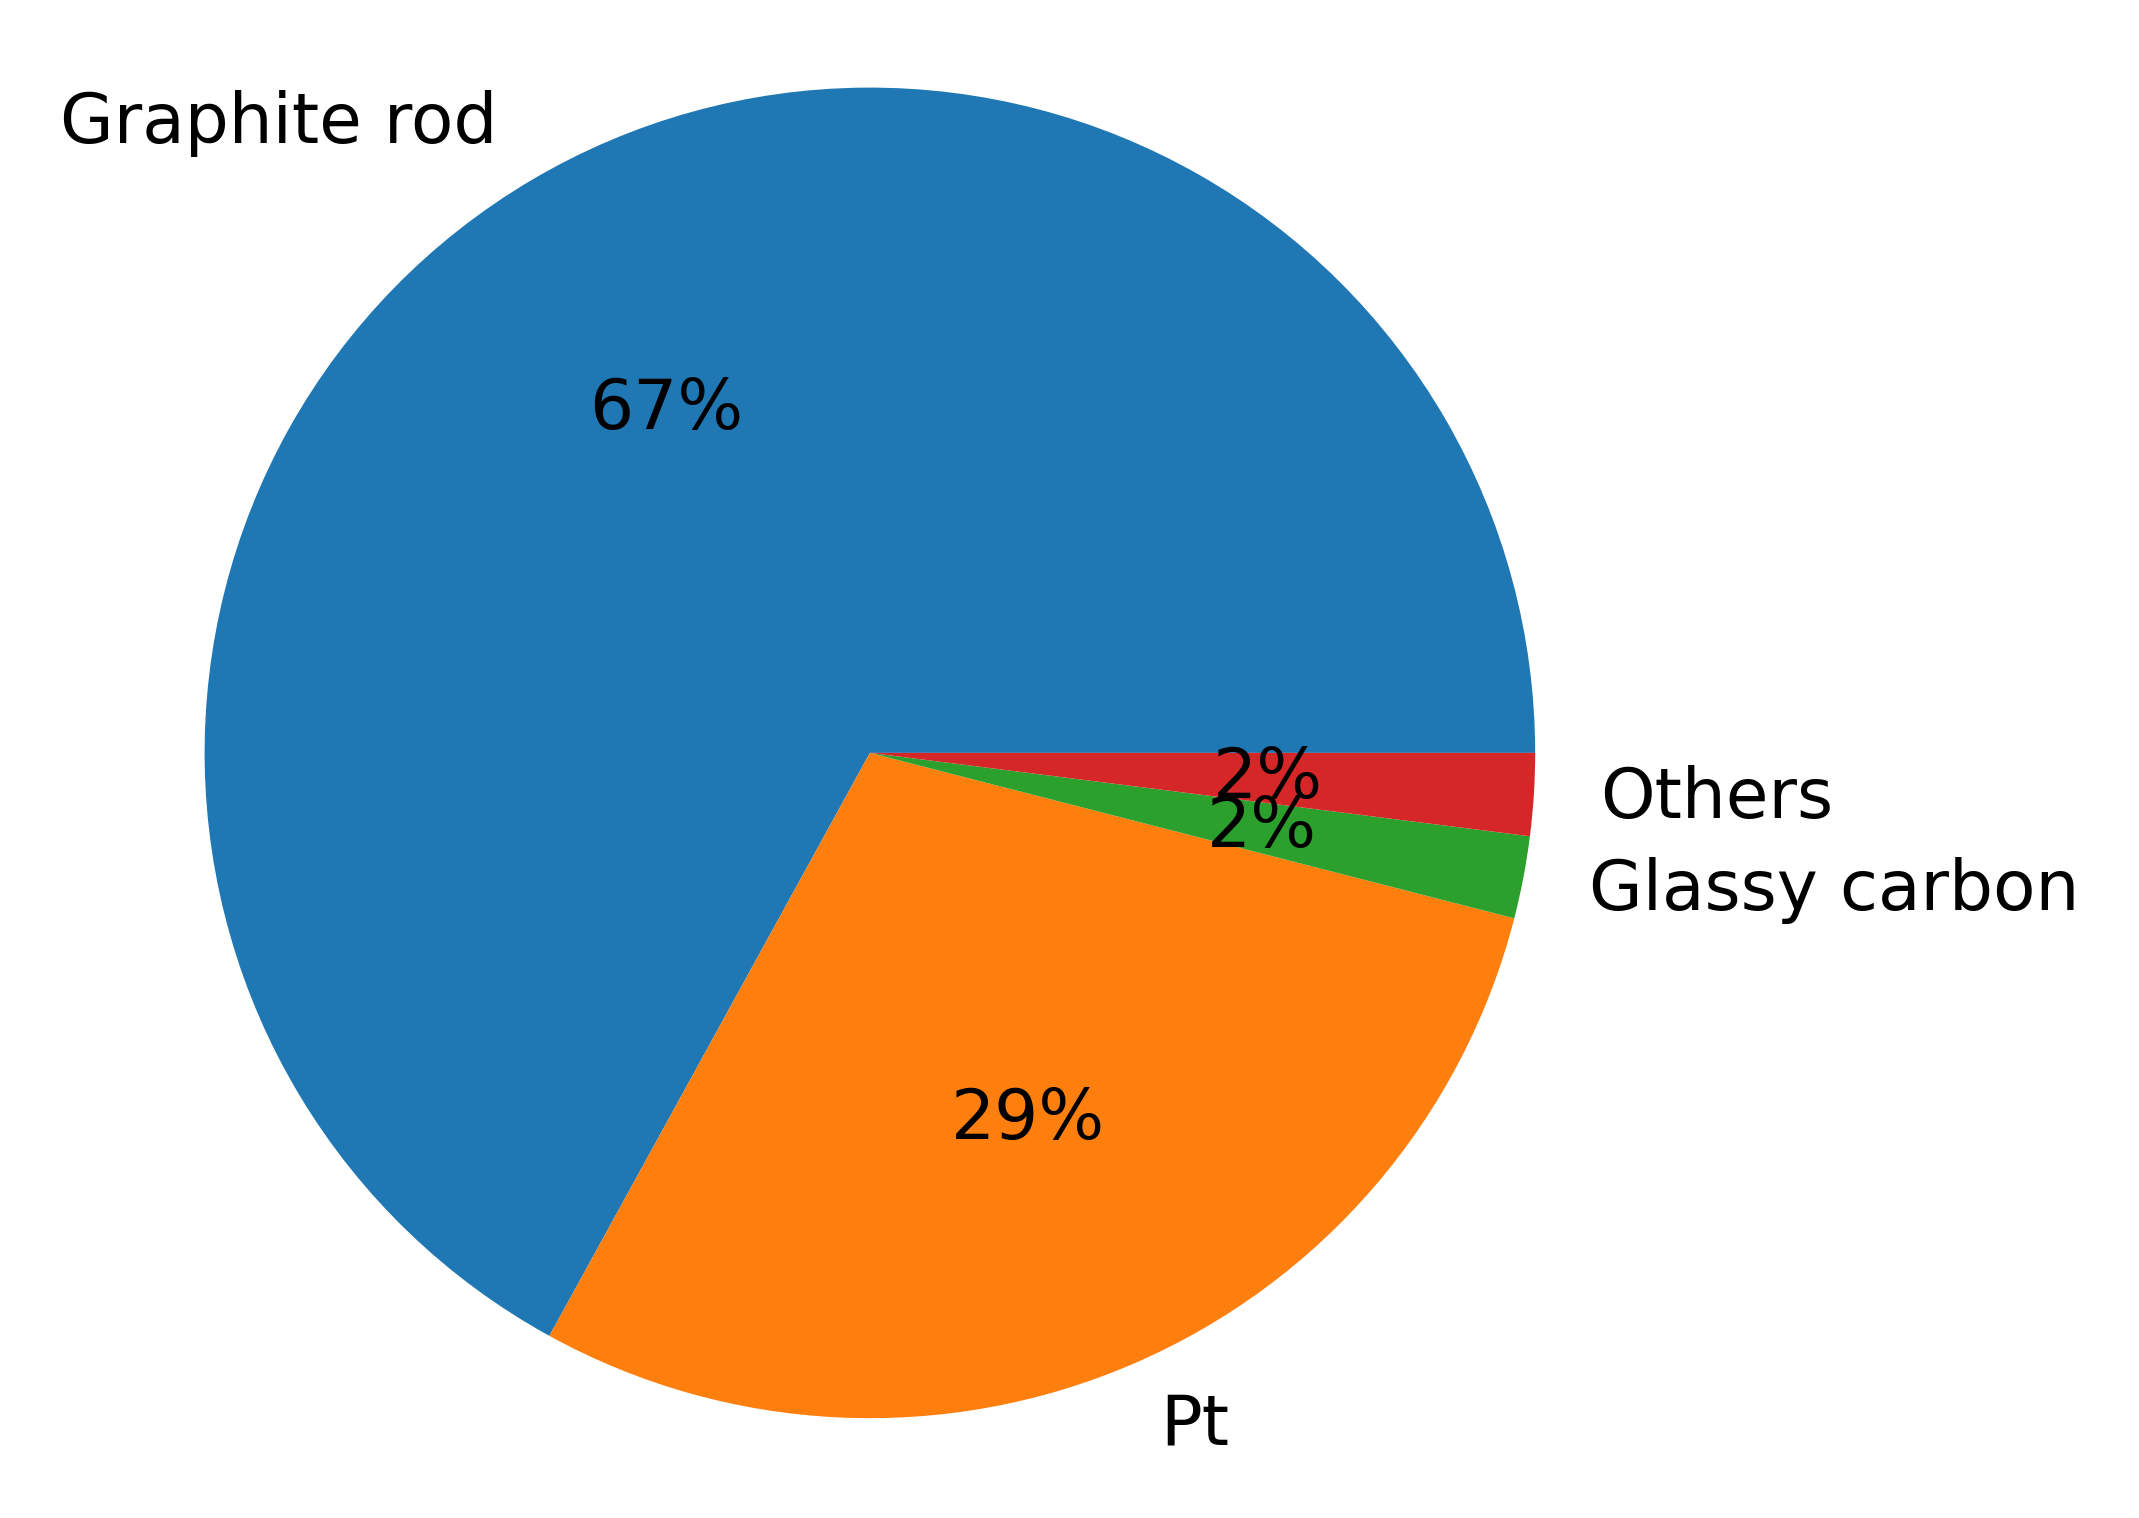

In [41]:
data = pd.read_csv('CE in literature.csv')
print(data)
fig, ax = plt.subplots(figsize = (4,3))

ax.pie(data['Value'], labels = data['Category'], autopct='%.0f%%',
       textprops={'size': 'smaller'}, radius=1.2
      )

## Change of C surface state with resting time

Text(0, 0.5, '$E_{CE}$ / V vs. RHE')

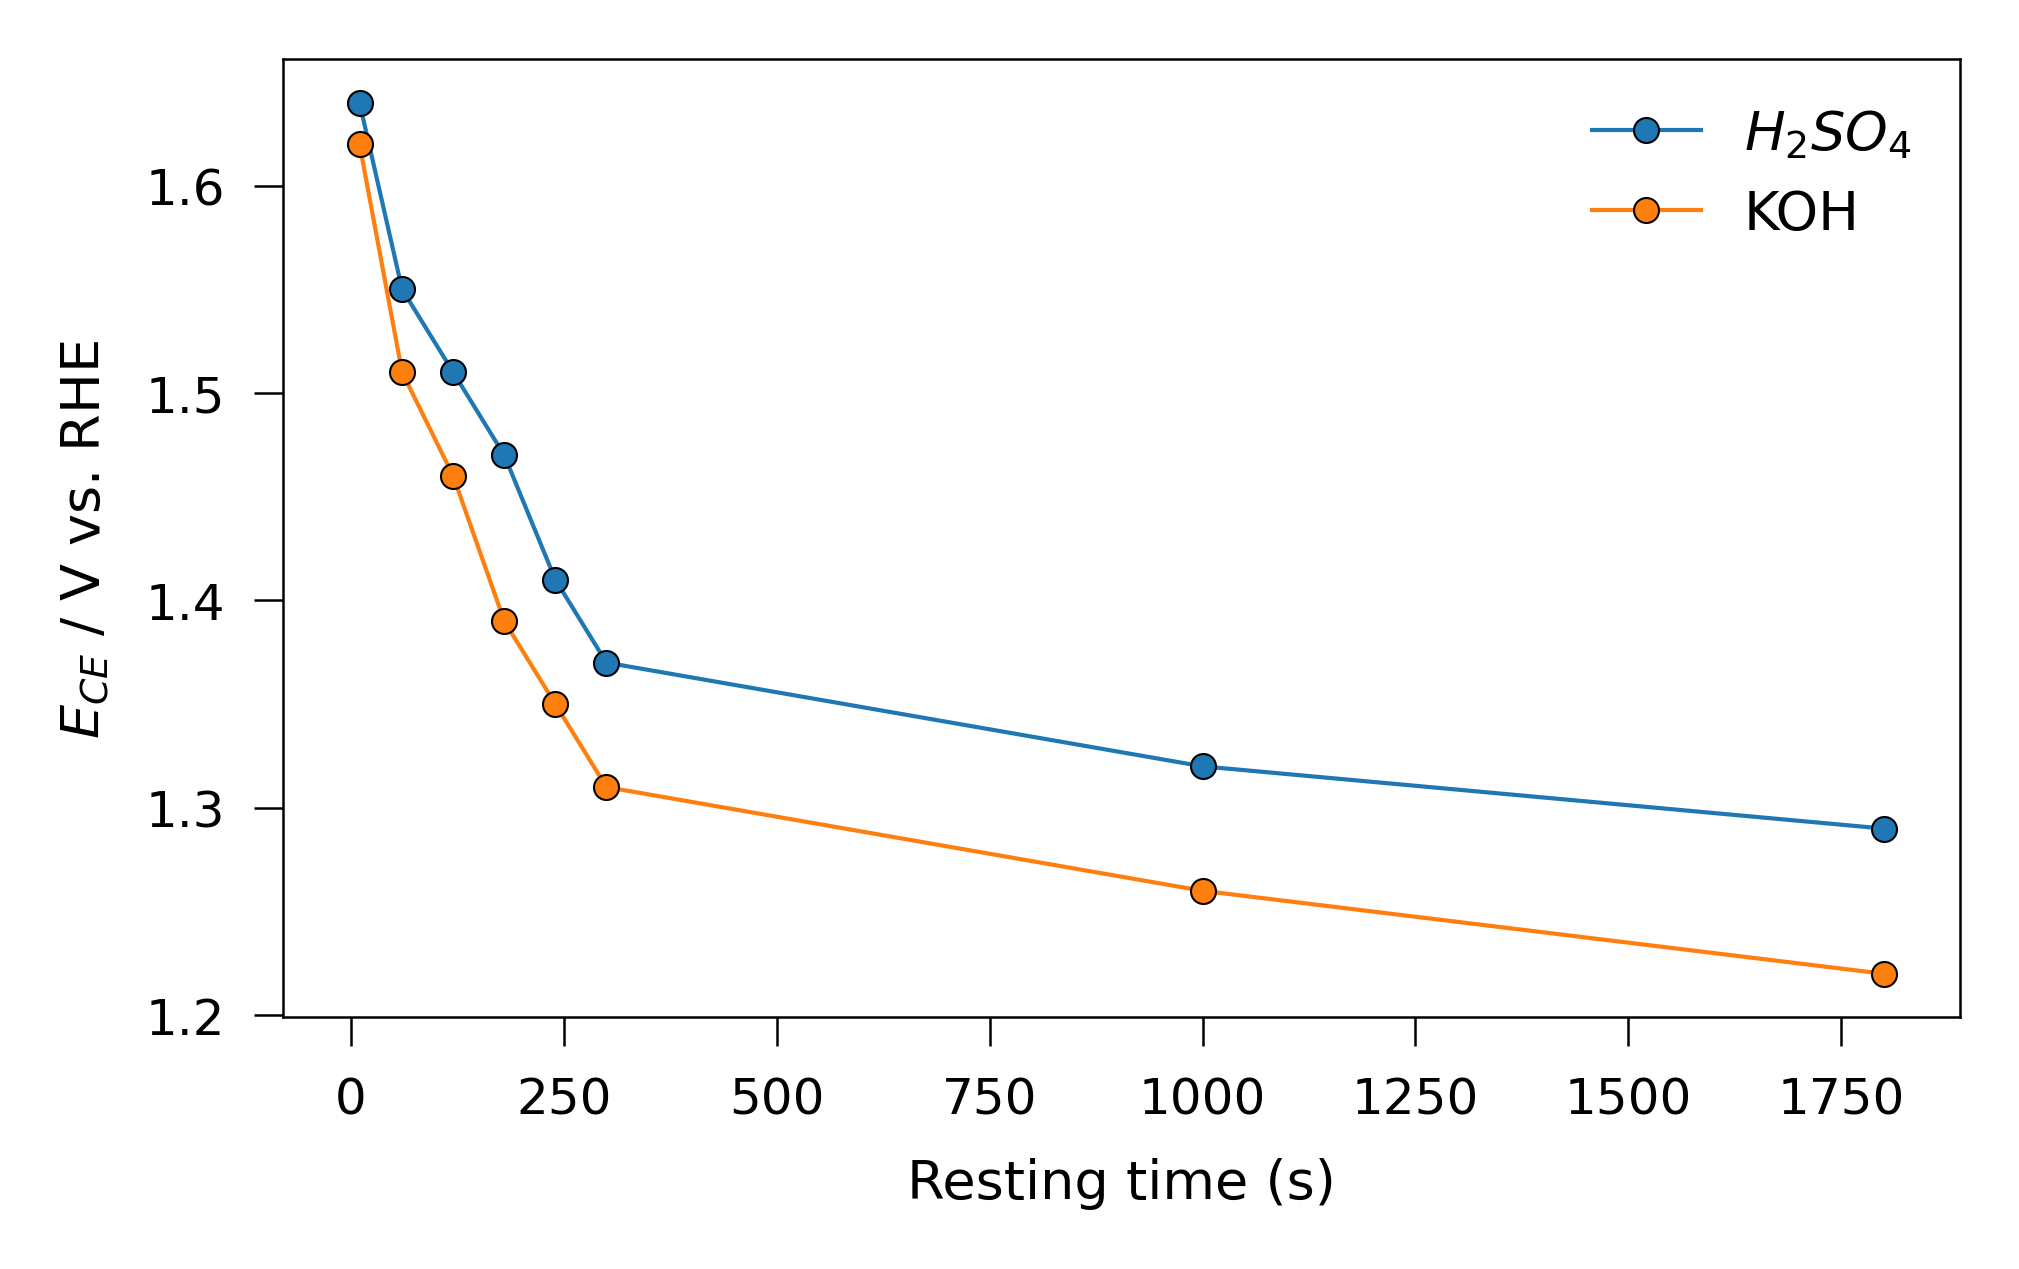

In [42]:
#The effect of resting time , acid and alkaline
# 定义变量
fig, ax = plt.subplots(figsize = (3.25,2),layout='constrained')
resting_time = [10, 60, 120, 180, 240, 300, 1000, 1800]

# in acid
V_counter = [1.64, 1.55, 1.51, 1.47, 1.41, 1.37, 1.32, 1.29]
ax.plot(resting_time, V_counter, 'o-', label = r'$H_2SO_4$')
# in base
V_counter = [1.62, 1.51, 1.46, 1.39, 1.35, 1.31, 1.26, 1.22]
ax.plot(resting_time, V_counter, 'o-', label = 'KOH')

ax.legend()
plt.xlabel('Resting time (s)')
plt.ylabel('$E_{CE}$ / V vs. RHE')